In [6]:
from io import StringIO

import pandas as pd
import requests

# Set display options
pd.set_option(
    "display.float_format", lambda x: "%.1f" % x
)  # Sets precision to 1 decimal places


# PART 1: Initial Data Analysis
print("PART 1: Initial Data Analysis \n")
# URL of the CSV file
url = "https://raw.githubusercontent.com/Anastasia-front/data-science/main/csv/2017_jun_final.csv"

# Read the CSV file content from the URL
response = requests.get(url)
content = response.content.decode("utf-8")

# 1. Read the file `2017_jun_final.csv` using the `read_csv` method.
data = pd.read_csv(StringIO(content))

PART 1: Initial Data Analysis 



In [5]:
# 2. Read the obtained table using the `head` method.
print("2. Head of the DataFrame: \n")
# Transpose the DataFrame to display it in one row
first_5_transposed = data.iloc[:5].T
print(first_5_transposed)

2. Head of the DataFrame: 

                                                                                  0  \
N                                                                                 1   
Посада                                                           Junior QA engineer   
Мова програмування                                                              NaN   
Спеціалізація                                                             Manual QA   
Загальний досвід роботи                                                         0.5   
Досвід роботи на поточному місці                                                0.5   
Зарплата на місяць                                                              400   
Зміна зарплати за 12 місяців                                                      0   
Місто                                                                        Харків   
Розмір компанії                                                          до 10 осіб   
Тип компанії   

In [8]:
# 3. Determine the size of the table using the `shape` method.
print("3. Size of the DataFrame:", data.shape)

3. Size of the DataFrame: (8704, 25)


In [9]:
# 4. Determine the data types of all columns using the `dtypes` attribute.
print("4. Data types of all columns: \n")
print(data.dtypes)

4. Data types of all columns: 

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64


In [10]:
# 5. Calculate the proportion of missing values in each column
missing_values_proportion = data.isnull().sum() / len(data)
print("5. Proportion of missing values in each column: \n")
print(missing_values_proportion)

5. Proportion of missing values in each column: 

N                                  0.0
Посада                             0.0
Мова програмування                 0.4
Спеціалізація                      0.8
Загальний досвід роботи            0.0
Досвід роботи на поточному місці   0.0
Зарплата на місяць                 0.0
Зміна зарплати за 12 місяців       0.0
Місто                              0.0
Розмір компанії                    0.0
Тип компанії                       0.0
Стать                              0.0
Вік                                0.0
Освіта                             0.0
Університет                        0.0
Ще студент                         0.0
Рівень англійської                 0.0
Предметна область                  0.0
Дата заповнення                    0.0
User.Agent                         0.0
exp                                0.0
current_job_exp                    0.0
salary                             0.0
Валюта                             1.0
cls           

In [11]:
# PART 2: Data Cleaning
print("\nPART 2: Data Cleaning \n")

# 6. Calculate the proportion of missing values after removing columns with missing values except the "Programming Language" column.
# 6.1. Removing columns with missing values except the 'Programming Language' column
print(
    "6.1. Removing columns with missing values except the 'Programming Language' column: \n"
)
columns_to_keep = ["Мова програмування"]
data_cleaned = data.dropna(subset=columns_to_keep, how="any")
print(data_cleaned.head())
print("\n", "~" * 20, "\n")
# 6.2. Proportion of missing values after cleaning
print("\n6.2. Proportion of missing values after cleaning: \n")
missing_values_proportion_cleaned = data_cleaned.isnull().sum() / len(data_cleaned)
print(missing_values_proportion_cleaned)


PART 2: Data Cleaning 

6.1. Removing columns with missing values except the 'Programming Language' column: 

   N                    Посада Мова програмування Спеціалізація  \
2  3         Software Engineer            C#/.NET           NaN   
3  4         Software Engineer         JavaScript           NaN   
4  5  Senior Software Engineer         JavaScript           NaN   
6  7  Junior Software Engineer            C#/.NET           NaN   
7  8  Senior Software Engineer                C++           NaN   

  Загальний досвід роботи Досвід роботи на поточному місці  \
2                       4                                1   
3                       5                                4   
4       10 і більше років                              0.5   
6                       1                  менше 3 місяців   
7                       6                                1   

   Зарплата на місяць  Зміна зарплати за 12 місяців         Місто  \
2                2500                       

In [12]:
# 7. Delete all rows with missing values in the original table
print("7.Delete all rows with missing values in the original table: \n")
data_cleaned = data.dropna()
print(data_cleaned.head())

7.Delete all rows with missing values in the original table: 

Empty DataFrame
Columns: [N, Посада, Мова програмування, Спеціалізація, Загальний досвід роботи, Досвід роботи на поточному місці, Зарплата на місяць, Зміна зарплати за 12 місяців, Місто, Розмір компанії, Тип компанії, Стать, Вік, Освіта, Університет, Ще студент, Рівень англійської, Предметна область, Дата заповнення, User.Agent, exp, current_job_exp, salary, Валюта, cls]
Index: []

[0 rows x 25 columns]


In [13]:
# 8. Determine the new size of the table
print(
    "8. New size of the DataFrame after dropping rows with missing values:",
    data_cleaned.shape,
)

8. New size of the DataFrame after dropping rows with missing values: (0, 25)


In [14]:
# PART 3: Creating Subset and Aggregation
print("\nPART 3: Creating Subset and Aggregating Data \n")

# 9. Create a new table `python_data` containing only rows where developers indicated the Python programming language.
python_data = data[data["Мова програмування"] == "Python"]
print("9. Size of python_data:", python_data.shape)


PART 3: Creating Subset and Aggregating Data 

9. Size of python_data: (207, 25)


In [15]:
# 10. Perform grouping by the "Position" column
print("10. Perform grouping by the 'Position' column: \n")
grouped_data = data.groupby("Посада")
print(grouped_data.head())

10. Perform grouping by the 'Position' column: 

         N                    Посада Мова програмування Спеціалізація  \
0        1        Junior QA engineer                NaN     Manual QA   
1        2        Junior QA engineer                NaN     Manual QA   
2        3         Software Engineer            C#/.NET           NaN   
3        4         Software Engineer         JavaScript           NaN   
4        5  Senior Software Engineer         JavaScript           NaN   
...    ...                       ...                ...           ...   
3367  3368              Scrum Master                NaN           NaN   
3447  3448         Research Engineer                NaN           NaN   
3535  3536         Research Engineer                NaN           NaN   
3740  3741             Game designer                NaN           NaN   
3866  3867       Security Specialist                NaN           NaN   

     Загальний досвід роботи Досвід роботи на поточному місці  \
0        

In [18]:
# 11. Create a new DataFrame with aggregated data for the "Position" column
aggregated_data = grouped_data.agg({"Зарплата на місяць": ["min", "max"]})
print("11. Aggregated data for the 'Position' column: \n")
print(aggregated_data)

11. Aggregated data for the 'Position' column: 

                                           Зарплата на місяць       
                                                          min    max
Посада                                                              
Business analyst                                          200   5000
DBA                                                       380   6000
Data Scientist / Data Analyst                             150   8000
Designer                                                  100   4000
DevOps                                                    194  10000
Director of Engineering / Program Director               1500  34000
ERP / CRM                                                 100   6000
Game designer                                             150   6800
HR                                                        100   7000
HTML coder                                                154   3000
Junior QA engineer                                    

In [19]:
# PART 4: Data Transformation and Analysis
print("\nPART 4: Data Transformation and Analysis \n")


# 12. Create a function `fill_avg_salary` that returns the average monthly salary
def fill_avg_salary(row):
    return row["Зарплата на місяць"].mean()


# def fill_avg_salary(group):
#     return group.mean()
print(
    "12. Create a function `fill_avg_salary` that returns the average monthly salary: \n"
)
print(
    """def fill_avg_salary(row):
    return row['Зарплата на місяць'].mean()"""
)


PART 4: Data Transformation and Analysis 

12. Create a function `fill_avg_salary` that returns the average monthly salary: 

def fill_avg_salary(row):
    return row['Зарплата на місяць'].mean()


In [20]:
# 13. Apply the function to create a new column named "avg"
aggregated_data["avg"] = aggregated_data.apply(fill_avg_salary, axis=1)
# aggregated_data["avg"] = aggregated_data.groupby("Посада")["Зарплата на місяць"].transform(fill_avg_salary)
print("13. Apply the function to create a new column named 'avg': \n")
print(aggregated_data.head())

13. Apply the function to create a new column named 'avg': 

                              Зарплата на місяць           avg
                                             min    max       
Посада                                                        
Business analyst                             200   5000 2600.0
DBA                                          380   6000 3190.0
Data Scientist / Data Analyst                150   8000 4075.0
Designer                                     100   4000 2050.0
DevOps                                       194  10000 5097.0


In [21]:
# 14. Generate descriptive statistics for the new column
print("14. Descriptive statistics for the 'avg' column: \n")
print(aggregated_data["avg"].describe())

14. Descriptive statistics for the 'avg' column: 

count      32.0
mean     3449.2
std      3093.9
min       900.0
25%      1820.5
50%      2837.5
75%      3756.2
max     17750.0
Name: avg, dtype: float64


In [22]:
# 15. Save the resulting table to a CSV file
aggregated_data.to_csv("cleaned_data.csv", index=False)
print("15. Save the resulting table to a CSV file: \n")
print(
    "Data analysis and cleaning completed successfully and saved the resulting table to a CSV file called cleaned_data. \n"
)

15. Save the resulting table to a CSV file: 

Data analysis and cleaning completed successfully and saved the resulting table to a CSV file called cleaned_data. 



VIZUALIZATION

1. Distribution of Programming Languages Among Developers (Bar Plot)



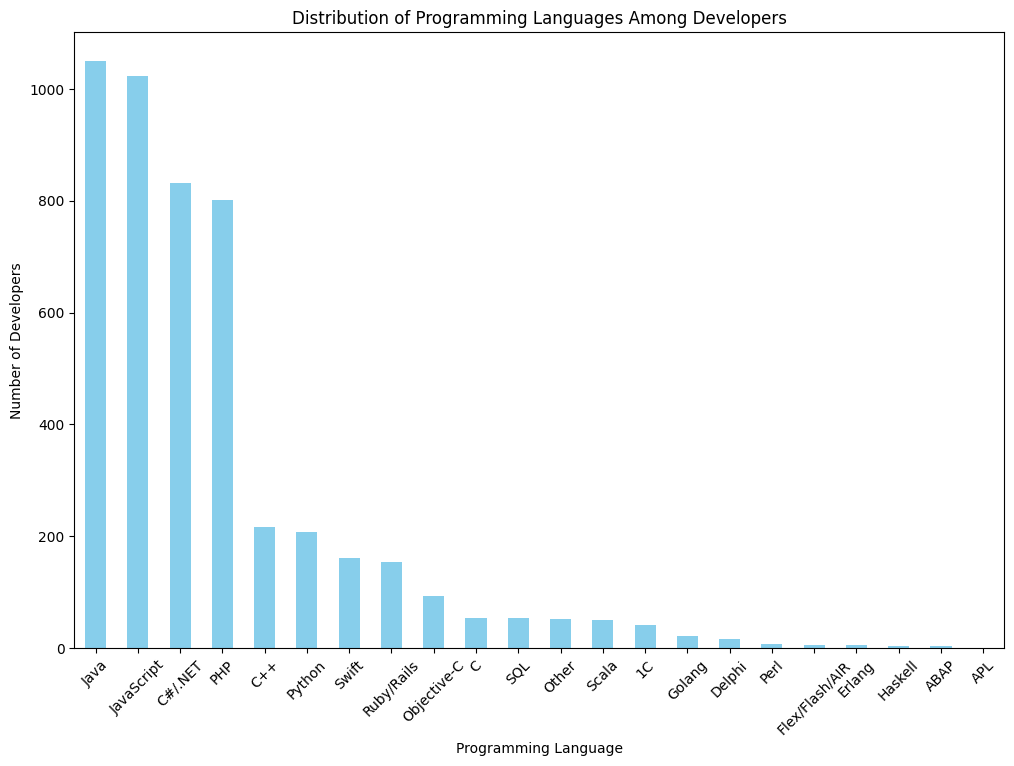

In [23]:
import matplotlib.pyplot as plt

print("VIZUALIZATION")


# Plot 1: Distribution of Programming Languages Among Developers (Bar Plot)
print("\n1. Distribution of Programming Languages Among Developers (Bar Plot)\n")
plt.figure(figsize=(12, 8))
language_distribution = data["Мова програмування"].value_counts()
language_distribution.plot(kind="bar", color="skyblue")
plt.title("Distribution of Programming Languages Among Developers")
plt.xlabel("Programming Language")
plt.ylabel("Number of Developers")
plt.xticks(rotation=45)
plt.show()


2. Distribution of Spesializations Among QA (Pie Plot)



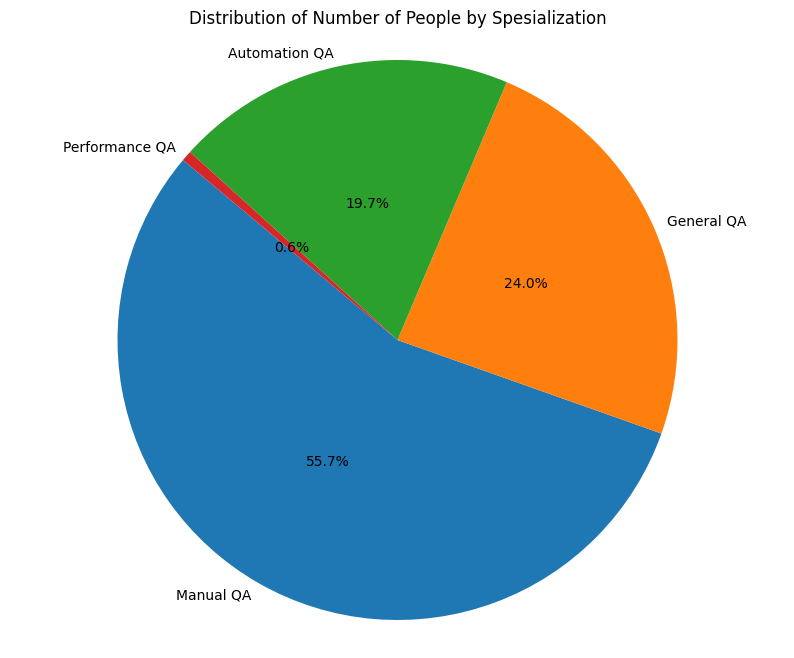

In [24]:
# Plot 2: Distribution of Spesializations Among QA (Pie Plot)
print("\n2. Distribution of Spesializations Among QA (Pie Plot)\n")
plt.figure(figsize=(10, 8))
distribution = data["Спеціалізація"].value_counts()
labels = distribution.index
data = distribution.values
plt.pie(
    data,
    labels=labels,
    autopct="%.1f%%",
    pctdistance=0.5,
    labeldistance=1.05,
    startangle=140,
)
plt.title("Distribution of Number of People by Spesialization")
plt.axis("equal")
plt.show()


3. Aggregated Data for Minimum and Maximum Monthly Salary by Position (Bar Plot)



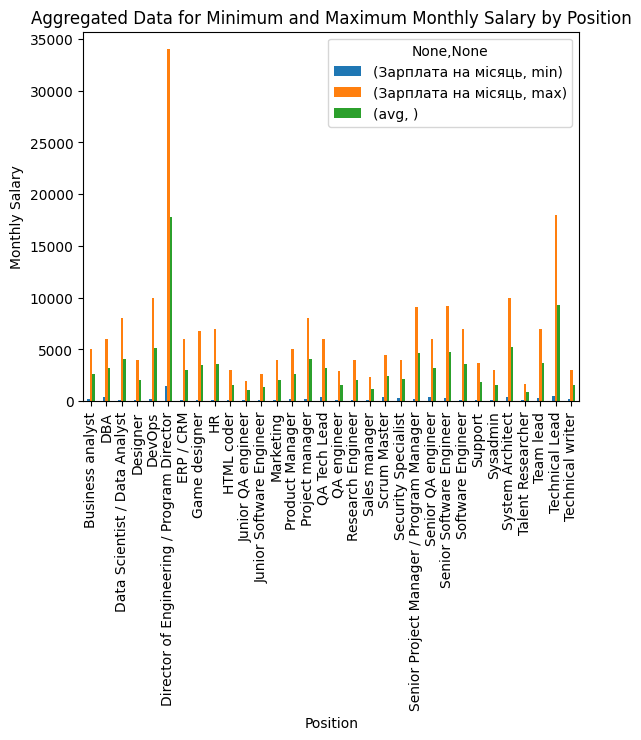

In [27]:
# Plot 3: Aggregated Data for Minimum and Maximum Monthly Salary by Position (Bar Plot)
print(
    "\n3. Aggregated Data for Minimum and Maximum Monthly Salary by Position (Bar Plot)\n"
)
aggregated_data.plot(kind="bar", stacked=False)
plt.title("Aggregated Data for Minimum and Maximum Monthly Salary by Position")
plt.xlabel("Position")
plt.ylabel("Monthly Salary")
plt.xticks(rotation=90)  # Rotated labels for better readability
plt.show()